<a href="https://colab.research.google.com/github/AjayTeja641/Flappy-Learner-WIDS-Project/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset


In [8]:
import os


files_in_directory = os.listdir(path)
print(f"Files in directory '{path}': {files_in_directory}")


csv_file_name = "Titanic-Dataset.csv"
full_csv_path = os.path.join(path, csv_file_name)

data_set = pd.read_csv(full_csv_path)
data_set.head()

Files in directory '/kaggle/input/titanic-dataset': ['Titanic-Dataset.csv']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data_set['Age'].fillna(data_set['Age'].mean(), inplace=True)
data_set['Embarked'].fillna(data_set['Embarked'].mode()[0], inplace=True)
data_set.drop('Cabin', axis=1, inplace=True)
data_set.dropna(inplace=True)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


/tmp/ipython-input-615481246.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set['Age'].fillna(data_set['Age'].mean(), inplace=True)
/tmp/ipython-input-615481246.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [30]:
data_set = data_set[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_set["Sex"] = le.fit_transform(data_set["Sex"])
data_set["Embarked"] = le.fit_transform(data_set["Embarked"])
data_set.head()

/tmp/ipython-input-1328959533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set["Sex"] = le.fit_transform(data_set["Sex"])
/tmp/ipython-input-1328959533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set["Embarked"] = le.fit_transform(data_set["Embarked"])


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = data_set.drop(["Survived", "Embarked"], axis = 1)
y = data_set["Survived"]
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 0.82737724,  0.73769513, -0.5924806 , -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901,  0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354,  0.        , -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.2846632 , -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.17706291, -0.49237783, -0.67817453]])

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.7988826815642458
Precision: 0.7638888888888888
Recall: 0.7432432432432432


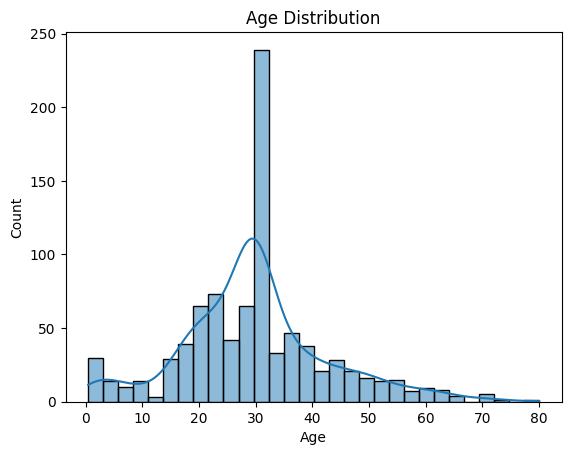

In [22]:
import matplotlib.pyplot as plt

sns.histplot(data_set["Age"], kde=True)
plt.title("Age Distribution")
plt.show()


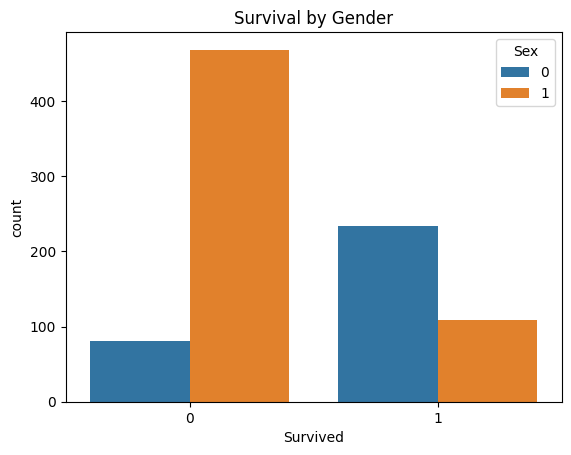

In [23]:
sns.countplot(x="Survived", hue="Sex", data=data_set)
plt.title("Survival by Gender")
plt.show()


In [32]:
import numpy as np

# New passenger details
# pclass, sex, age, fare, embarked
new_person = np.array([ [3, 0, 26.0, 7.9250, 2]])


new_person_scaled = sc.transform(new_person)


prediction = model.predict(new_person_scaled)


if prediction[0] == 1:
    print("The person is predicted to SURVIVE")
else:
    print("The person is predicted to NOT survive")


The person is predicted to SURVIVE


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
